<a href="https://colab.research.google.com/github/hbendeguz/DeepLearningCourse/blob/master/fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive/Colab Notebooks"

 data_0_31.npy	 'Preproc (1).ipynb'   train.npy	       Untitled0.ipynb
 data_32_63.npy   Preproc.ipynb        train_transaction.csv   Untitled1.ipynb
 fraud.ipynb	  test.npy	       tr_iv.csv


In [0]:
dt_iv = pd.read_csv('/content/drive/My Drive/Colab Notebooks/tr_iv.csv')

In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train_transaction.csv')

In [0]:
! pip install scorecardpy

     |████████████████████████████████| 61kB 1.8MB/s 
  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.1.1-cp36-none-any.whl size=58169 sha256=6114c3cd18452f0668b07605c08c2a434c8b064275cee4c51da4affabdb8c006
  Stored in directory: /root/.cache/pip/wheels/8f/4c/98/567ff70984acd88ffae211d8fc209e34b98fb43ff27f09fdd3
Successfully built scorecardpy


In [0]:
df_reduced = df[dt_iv[dt_iv.info_value > 0.15].variable]
df_reduced.head()

,TransactionAmt,V307,V308,card1,V127,V317,V306,V128,V310,V318,V133,V126,V316,V314,V134,C4,V130,C12,C8,card2,C7,V132,V315,V312,C10,V313,V320,V45,V52,V321,V94,V79,addr1,V51,V34,V44,V74,V87,V33,V70,...,V95,V77,V5,M3,V3,V280,M2,V9,V293,V97,V4,V7,card6,V2,V8,V279,V6,M1,V1,V129,V54,V23,V47,V53,V67,V96,V123,V13,V62,V24,V56,M9,V76,V12,M8,P_emaildomain,M7,V75,V36,V125
0,68.5,117.0,0.0,13926,117.0,117.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,315.0,NaN,0.0,NaN,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,T,1.0,0.0,T,1.0,0.0,0.0,1.0,1.0,credit,1.0,1.0,0.0,1.0,T,1.0,0.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,1.0
1,29.0,0.0,0.0,2755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,404.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,325.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,credit,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,NaN,0.0,0.0,NaN,gmail.com,NaN,0.0,0.0,1.0
2,59.0,0.0,0.0,4663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,490.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,330.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,T,1.0,0.0,T,1.0,0.0,0.0,1.0,1.0,debit,1.0,1.0,0.0,1.0,T,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,F,1.0,1.0,F,outlook.com,F,1.0,1.0,1.0
3,50.0,1758.0,925.0,18132,1758.0,1404.0,50.0,925.0,354.0,790.0,1404.0,50.0,50.0,0.0,790.0,0.0,354.0,0.0,0.0,567.0,0.0,50.0,0.0,135.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,476.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,NaN,NaN,NaN,28.0,NaN,NaN,1.0,28.0,NaN,NaN,debit,NaN,NaN,1.0,NaN,NaN,NaN,0.0,1.0,1.0,1.0,1.0,1.0,48.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,yahoo.com,NaN,1.0,1.0,1.0
4,50.0,0.0,0.0,4497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,514.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,420.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,credit,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gmail.com,NaN,NaN,NaN,1.0


In [0]:
import scorecardpy as sc

df = df.dropna(axis = 1,thresh= int(0.3 *len(df)))


In [0]:
shape(df)

(590540, 226)

In [0]:
info_values = sc.iv(df, y="isFraud")



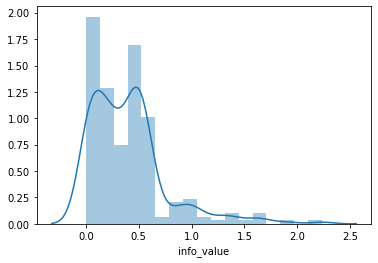

In [0]:
import seaborn as sn

sn.distplot(info_values.info_value)

In [0]:
len(info_values[info_values.info_value > 0.15])

161

In [0]:
info_values.to_csv('/content/drive/My Drive/Colab Notebooks/info_values.csv')

In [0]:
info_values

In [0]:
df_reduced = df[info_values[info_values.info_value > 0.15].variable]

In [0]:
shape(df_reduced)

(590540, 162)

In [0]:
import scorecardpy as sc
df_reduced['isFraud'] = df['isFraud']

bins = sc.woebin(df_reduced, y="isFraud", bin_num_limit = 4, print_step=1)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[INFO] creating woe binning ...
>>> There are 1 variables have too many unique non-numberic values, which might cause the binning process slow. Please double check the following variables: 
P_emaildomain
>>> Continue the binning process?
1: yes 
2: no
Selection: 1


/usr/local/lib/python3.6/dist-packages/scorecardpy/woebin.py:725: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  binning = pd.concat(bin_list, keys=bin_list.keys()).reset_index()\


Binning on 590540 rows and 162 columns in 00:07:52


In [0]:
ivs = pd.DataFrame({'var': ['init'], 'iv': [0] })
for i in bins.keys():
  ivs = ivs.append(pd.DataFrame({'var': [i], 'iv': [bins[i].total_iv[0]] }))
 # bins[i].total_iv

In [0]:
ivs.head()

,var,iv
0,init,0.000000
0,V308,0.147391
0,V56,0.172573
0,V321,0.000135
0,V92,0.510250


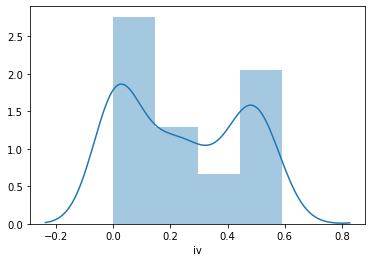

In [0]:
sn.distplot(ivs.iv)

In [0]:
#ivs.to_csv('/content/drive/My Drive/Colab Notebooks/info_values_binning.csv')

In [0]:
ivs = pd.read_csv('/content/drive/My Drive/Colab Notebooks/info_values_binning.csv')

In [0]:
ivs[ivs.iv > 0.1]['var']

1       V308
2        V56
4        V92
5         M7
7      addr1
       ...  
157       V7
158      V53
159      D15
160       M3
161      V58
Name: var, Length: 104, dtype: object

In [0]:
df_to_woe = df_reduced[ivs[ivs.iv > 0.1]['var']]
shape(df_to_woe)

(590540, 104)

In [0]:
df_to_woe['isFraud'] = df_reduced['isFraud']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
import pickle
f = open("/content/drive/My Drive/Colab Notebooks/bins.pkl","wb")
pickle.dump(bins,f)
f.close()

In [0]:
shape(df_to_woe)

(590540,)

In [0]:
df_to_woe = df_to_woe.drop('isFraud', axis = 1)

In [0]:
df_woe = sc.woebin_ply(df_to_woe, bins)

[INFO] converting into woe values ...
Woe transformating on 590540 rows and 104 columns in 00:03:25


In [0]:
c = df_woe.corr().abs()

In [0]:
c

,V308_woe,V56_woe,V92_woe,M7_woe,addr1_woe,V64_woe,C1_woe,V42_woe,M4_woe,V2_woe,V43_woe,V13_woe,V10_woe,V71_woe,C2_woe,V1_woe,V40_woe,V9_woe,V15_woe,V29_woe,C11_woe,V4_woe,D2_woe,V72_woe,V74_woe,V16_woe,D4_woe,V93_woe,V59_woe,V78_woe,V50_woe,V60_woe,V81_woe,ProductCD_woe,V38_woe,V70_woe,V57_woe,V6_woe,V282_woe,V49_woe,...,V79_woe,V39_woe,M8_woe,V69_woe,P_emaildomain_woe,M9_woe,V94_woe,V303_woe,C5_woe,V5_woe,V90_woe,V8_woe,V73_woe,V32_woe,D3_woe,dist1_woe,V87_woe,V54_woe,V304_woe,V283_woe,V36_woe,V18_woe,V48_woe,M2_woe,V51_woe,V302_woe,C13_woe,V63_woe,V280_woe,V12_woe,V52_woe,D11_woe,D1_woe,card3_woe,M6_woe,V7_woe,V53_woe,D15_woe,M3_woe,V58_woe
V308_woe,1.000000,0.164795,0.057348,0.004760,0.033834,0.048660,0.088834,0.039204,0.074615,0.027450,0.038930,0.098074,0.070637,0.056648,0.153400,0.027450,0.038772,0.027450,0.071328,0.139003,0.107583,0.027442,0.011991,0.055646,0.024665,0.071370,0.024765,0.057346,0.049989,0.136771,0.044013,0.048876,0.052725,0.046812,0.146981,0.129412,0.074592,0.027450,0.162118,0.128968,...,0.064836,0.039025,0.001474,0.131514,0.026447,0.001317,0.046914,0.055940,0.114490,0.027515,0.141159,0.027450,0.050851,0.051714,0.396027,0.070572,0.027162,0.115598,0.056488,0.247315,0.068924,0.049948,0.129457,0.019237,0.027344,0.058561,0.046612,0.049942,0.885216,0.071082,0.010828,0.036453,0.077686,0.051406,0.056946,0.027450,0.083406,0.065763,0.017026,0.073538
V56_woe,0.164795,1.000000,0.389751,0.264727,0.099963,0.456831,0.114189,0.266443,0.037819,0.337876,0.267977,0.351080,0.288790,0.451411,0.028938,0.337876,0.269466,0.337876,0.388149,0.285852,0.073738,0.337875,0.233155,0.453504,0.454007,0.388133,0.113364,0.389763,0.453378,0.611024,0.267925,0.455753,0.390700,0.376224,0.424218,0.320682,0.456495,0.337876,0.315915,0.182346,...,0.361017,0.268126,0.261790,0.322604,0.017179,0.259412,0.357537,0.549339,0.287604,0.337425,0.269996,0.337876,0.452575,0.416724,0.235697,0.247888,0.282343,0.410663,0.548655,0.336060,0.125896,0.416342,0.182109,0.337836,0.248339,0.546662,0.182148,0.454128,0.188149,0.350854,0.249311,0.305642,0.220618,0.068603,0.502943,0.337876,0.425086,0.258980,0.333848,0.458712
V92_woe,0.057348,0.389751,1.000000,0.450517,0.761304,0.902047,0.137125,0.840472,0.501971,0.601861,0.841785,0.568810,0.466367,0.945993,0.018053,0.601861,0.844758,0.601861,0.915265,0.388803,0.082826,0.601861,0.261100,0.947434,0.865596,0.915429,0.211284,0.999965,0.902271,0.375239,0.896751,0.904063,0.944223,0.934809,0.282763,0.408485,0.918819,0.601861,0.251198,0.332898,...,0.938711,0.843610,0.441891,0.407073,0.224720,0.434339,0.909527,0.856493,0.405763,0.600036,0.400105,0.601861,0.886238,0.955051,0.234794,0.406115,0.257457,0.594490,0.854827,0.212539,0.462857,0.905121,0.332052,0.558133,0.836836,0.853230,0.237020,0.900027,0.026843,0.549163,0.820817,0.525946,0.270532,0.722832,0.823038,0.601861,0.574436,0.368538,0.551237,0.920268
M7_woe,0.004760,0.264727,0.450517,1.000000,0.296110,0.455970,0.077218,0.379149,0.176610,0.747880,0.379767,0.470690,0.633205,0.468177,0.042151,0.747880,0.381375,0.747880,0.432540,0.263695,0.059141,0.747891,0.090911,0.468625,0.429450,0.432604,0.078068,0.450528,0.456032,0.211490,0.397569,0.456515,0.434784,0.445460,0.148816,0.280601,0.452191,0.747880,0.092109,0.214255,...,0.428669,0.380830,0.968357,0.279492,0.072484,0.955562,0.418742,0.469306,0.267018,0.744205,0.262131,0.747880,0.439413,0.456871,0.102845,0.452529,0.170608,0.493861,0.468582,0.076006,0.379795,0.444350,0.214058,0.731839,0.376868,0.467801,0.117723,0.455412,0.012609,0.463383,0.370641,0.644202,0.096706,0.276350,0.450189,0.747880,0.485767,0.155429,0.726834,0.452646
addr1_woe,0.033834,0.099963,0.761304,0.296110,1.000000,0.674357,0.061722,0.746594,0.726468,0.369436,0.747675,0.331347,0.293449,0.703158,0.089943,0.369436,0.748602,0.369436,0.802280,0.254459,0.007857,0.369435,0.175173,0.704941,0.698680,0.802110,0.166113,0.761282,0.674331,0.188622,0.788711,0.676811,0.718138,0.808128,0.231030,0.242115,0.745261,0.369436,0.160255,0.263743,...,0.816828,0.747612,0.290087,0.240534,0.286095,0

In [0]:
c.to_csv('/content/drive/My Drive/Colab Notebooks/correlation.csv')

In [0]:
s = c.unstack()
so = s.sort_values(kind="quicksort")
so

V36_woe   D3_woe      0.000205
D3_woe    V36_woe     0.000205
V280_woe  M3_woe      0.000365
M3_woe    V280_woe    0.000365
V76_woe   C2_woe      0.000782
                        ...   
V17_woe   V17_woe     1.000000
V3_woe    V7_woe      1.000000
          V8_woe      1.000000
D15_woe   D15_woe     1.000000
V58_woe   V58_woe     1.000000
Length: 10816, dtype: float64

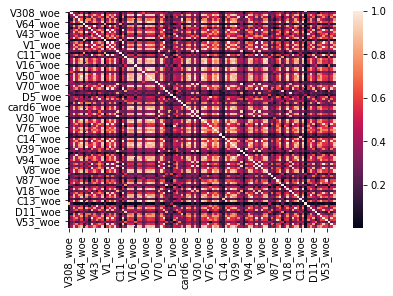

In [0]:
sn.heatmap(c)

In [0]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.9, solver='saga', n_jobs=-1)
lr.fit(df_woe[:280_000], df.isFraud[:280000])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=0.9, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=-1, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
train_pred = lr.predict_proba(df_woe[280000:])[:,1]


In [0]:
from sklearn.metrics import roc_auc_score, confusion_matrix

auc = roc_auc_score(df.isFraud[280000:], train_pred)
#conf = confusion_matrix(df.isFraud, np.where(train_pred > 0.5,1,0) )

In [0]:
auc

0.8337943274718083

In [0]:
conf

array([[568900,    977],
       [ 17209,   3454]])

In [0]:
conf = confusion_matrix(df.isFraud, np.where(train_pred > 0.75,1,0) )
conf

array([[569784,     93],
       [ 19773,    890]])

In [0]:
from sklearn.metrics import precision_recall_curve
p, r, th = precision_recall_curve(df.isFraud, train_pred)

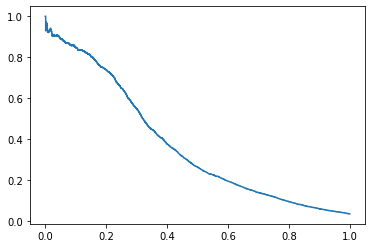

In [0]:
plot(r, p)

In [6]:
!pip install scorecardpy

     |████████████████████████████████| 61kB 2.9MB/s 
  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.1.1-cp36-none-any.whl size=58169 sha256=827b8c47100d9534d7c5cb18e41592d01c696935504e38879c4df1f20ec1c3f2
  Stored in directory: /root/.cache/pip/wheels/8f/4c/98/567ff70984acd88ffae211d8fc209e34b98fb43ff27f09fdd3
Successfully built scorecardpy


In [3]:
# start here after 
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train_transaction.csv')
ivs = pd.read_csv('/content/drive/My Drive/Colab Notebooks/info_values_binning.csv')

df_to_woe = df[ivs[ivs.iv > 0.1]['var']]
shape(df_to_woe)

(590540, 104)

In [0]:
import pickle
infile = open('/content/drive/My Drive/Colab Notebooks/bins.pkl','rb')
bins = pickle.load(infile)
infile.close()

In [7]:
# here starts
import scorecardpy as sc
df_woe = sc.woebin_ply(df_to_woe, bins)

[INFO] converting into woe values ...
Woe transformating on 590540 rows and 104 columns in 00:02:40


Correlation map
### 




In [0]:
c = df_woe.corr().abs()

In [0]:
adj_mat = pd.DataFrame(np.where(c > 0.5, 1, 0))

In [0]:
adj_mat.columns = c.columns

In [0]:
adj_mat.index = c.columns

In [19]:
adj_mat

,V283_woe,V93_woe,V43_woe,V34_woe,V302_woe,V280_woe,V56_woe,V58_woe,V15_woe,V2_woe,V38_woe,V4_woe,V76_woe,addr2_woe,V3_woe,V48_woe,V30_woe,V22_woe,V51_woe,V71_woe,V303_woe,card3_woe,V36_woe,P_emaildomain_woe,M7_woe,V9_woe,V33_woe,V50_woe,V79_woe,V32_woe,V57_woe,D2_woe,C14_woe,V53_woe,V74_woe,M9_woe,V63_woe,V11_woe,V5_woe,V6_woe,...,V54_woe,V80_woe,C13_woe,C1_woe,C11_woe,V18_woe,V21_woe,card5_woe,V85_woe,V39_woe,D3_woe,V31_woe,V91_woe,V73_woe,M2_woe,ProductCD_woe,V90_woe,V45_woe,V304_woe,V12_woe,C2_woe,V60_woe,M8_woe,V40_woe,D1_woe,M1_woe,V8_woe,V29_woe,C9_woe,V92_woe,C5_woe,card6_woe,V84_woe,M3_woe,V69_woe,M6_woe,V7_woe,V75_woe,V49_woe,V17_woe
V283_woe,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
V93_woe,0,1,1,1,1,0,0,1,1,1,0,1,1,1,1,0,0,1,1,1,1,1,0,0,0,1,1,1,1,1,1,0,0,1,1,0,1,0,1,1,...,1,1,0,0,0,1,1,0,1,1,0,1,0,1,1,1,0,0,1,1,0,1,0,1,0,1,1,0,1,1,0,0,1,1,0,1,1,1,0,1
V43_woe,0,1,1,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1,1,0,0,0,0,1,1,1,1,1,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,1,1,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1
V34_woe,0,1,1,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1,1,0,0,0,0,1,1,1,1,1,0,0,0,1,0,1,0,0,0,...,1,1,0,0,0,1,1,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1
V302_woe,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,0,1,1,1,1,0,0,0,0,1,1,1,1,1,1,0,0,1,1,0,1,0,1,1,...,1,1,0,0,0,1,1,0,1,1,0,1,0,1,1,1,0,0,1,1,0,1,0,1,0,1,1,0,1,1,0,0,1,1,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M6_woe,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,0,1,1,1,1,1,0,0,0,1,1,1,1,1,1,0,0,1,1,0,1,0,1,1,...,1,1,0,0,0,1,1,0,1,1,0,1,0,1,1,1,0,0,1,1,0,1,0,1,0,1,1,0,1,1,0,0,1,1,0,1,1,1,0,1
V7_woe,0,1,0,0,1,0,0,1,1,1,0,1,1,0,1,0,0,1,0,1,1,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,...,1,1,0,0,0,1,1,0,1,0,0,1,0,1,1,1,0,0,1,1,0,1,1,0,0,1,1,0,1,1,0,0,1,1,0,1,1,1,0,1
V75_woe,0,1,0,0,1,0,0,1,0,1,0,1,1,0,1,0,0,0,0,1,1,0,1,0,0,1,0,0,1,1,1,0,0,1,0,0,1,0,1,1,...,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,1,1,0,1,1,0,0,1,1,0,1,1,1,0,0
V49_woe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0


In [0]:
import networkx as nx

correlation_network = nx.from_pandas_adjacency(adj_mat)

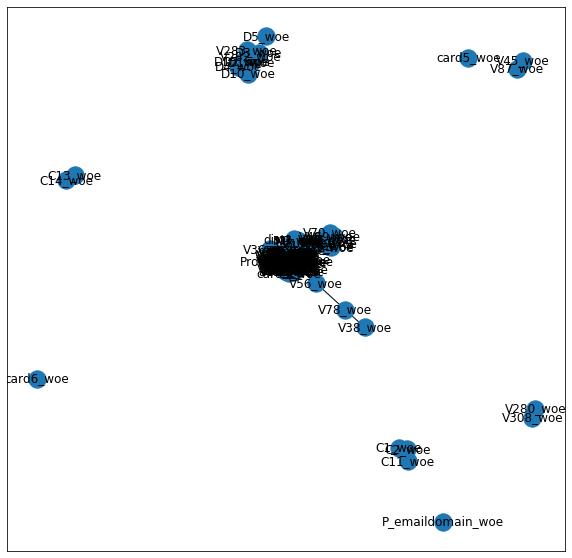

In [22]:
figsize(10, 10)
nx.draw_networkx(correlation_network  )

In [0]:
from networkx.algorithms.community import k_clique_communities
sets = list(k_clique_communities(correlation_network, 2))

In [24]:
len(sets)

6

In [0]:
sets = sorted(map(sorted, sets))


In [26]:
sets

[['C11_woe', 'C1_woe', 'C2_woe'],
 ['C13_woe', 'C14_woe'],
 ['C5_woe',
  'C9_woe',
  'D11_woe',
  'M1_woe',
  'M2_woe',
  'M3_woe',
  'M4_woe',
  'M6_woe',
  'M7_woe',
  'M8_woe',
  'M9_woe',
  'ProductCD_woe',
  'V10_woe',
  'V11_woe',
  'V12_woe',
  'V13_woe',
  'V15_woe',
  'V16_woe',
  'V17_woe',
  'V18_woe',
  'V1_woe',
  'V21_woe',
  'V22_woe',
  'V29_woe',
  'V2_woe',
  'V302_woe',
  'V303_woe',
  'V304_woe',
  'V30_woe',
  'V31_woe',
  'V32_woe',
  'V33_woe',
  'V34_woe',
  'V36_woe',
  'V38_woe',
  'V39_woe',
  'V3_woe',
  'V40_woe',
  'V42_woe',
  'V43_woe',
  'V48_woe',
  'V49_woe',
  'V4_woe',
  'V50_woe',
  'V51_woe',
  'V52_woe',
  'V53_woe',
  'V54_woe',
  'V56_woe',
  'V57_woe',
  'V58_woe',
  'V59_woe',
  'V5_woe',
  'V60_woe',
  'V63_woe',
  'V64_woe',
  'V69_woe',
  'V6_woe',
  'V70_woe',
  'V71_woe',
  'V72_woe',
  'V73_woe',
  'V74_woe',
  'V75_woe',
  'V76_woe',
  'V78_woe',
  'V79_woe',
  'V7_woe',
  'V80_woe',
  'V81_woe',
  'V84_woe',
  'V85_woe',
  'V8_woe',
 

In [27]:
final_vars = []
for i in range(0,len(sets)):
  f = sets[i][0]
  print(f)
  for j in range(1, len(sets[i])-1):
    if ivs[ivs['var'] == sets[i][j]]['iv'].any() > ivs[ivs['var'] == f]['iv'].any():
      f = j
  final_vars = final_vars + [f]

C11_woe
C13_woe
C5_woe
D10_woe
V280_woe
V45_woe


In [28]:
final_vars

['C11_woe', 'C13_woe', 'C5_woe', 'D10_woe', 'V280_woe', 'V45_woe']

In [39]:
ivs[ivs['var'] == 'V45']

,Unnamed: 0,var,iv
84,0,V45,0.357436


Now comes the logistic regression


In [44]:
from sklearn.linear_model import LogisticRegression

tr_s = 300_000

lr = LogisticRegression(penalty='l1', C=0.9, solver='saga', n_jobs=-1)
lr.fit(df_woe[final_vars][:tr_s], df.isFraud[:tr_s])

LogisticRegression(C=0.9, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=-1, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
train_pred = lr.predict_proba(df_woe[final_vars][tr_s:])[:,1]


In [46]:
from sklearn.metrics import roc_auc_score, confusion_matrix

auc = roc_auc_score(df.isFraud[tr_s:], train_pred)
print(auc)

0.8135358671396153


In [47]:
confusion_matrix(df.isFraud[tr_s:], np.where(train_pred > 0.25, 1, 0))

array([[277940,   2036],
       [  8555,   2009]])

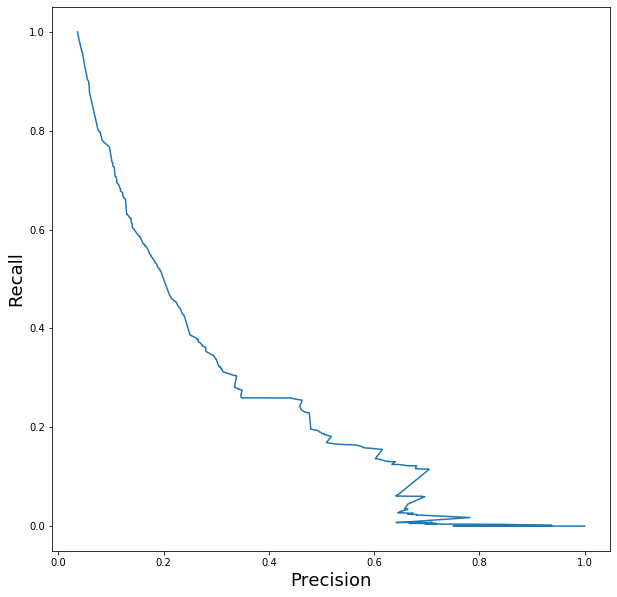

In [0]:
from sklearn.metrics import precision_recall_curve
p_bm, r_bm, th = precision_recall_curve(df.isFraud[tr_s:], train_pred)

plot(p_bm, r_bm)
ylabel('Recall', size = 18)
xlabel('Precision', size = 18)
show()

Well it is not the best :) but we have only 6 variables.

In [0]:
# Try to tweak the model:
C_par = [0.3, 0.5, 0.5, 0.7, 2]
penalty_par = ['l1', 'l2']

for i in C_par:
  for j in penalty_par:
    lr = LogisticRegression(penalty= j, C=i, solver='saga', n_jobs=-1)
    lr.fit(df_woe[final_vars][:tr_s], df.isFraud[:tr_s])
    train_pred = lr.predict_proba(df_woe[final_vars][tr_s:])[:,1]
    auc2 = roc_auc_score(df.isFraud[tr_s:], train_pred)
    print('auc: ' + str(round(auc2, 4))+ ' C: ' + str(i)+ ' penalty: ' + j)

auc: 0.8142 C: 0.3 penalty: l1
auc: 0.8142 C: 0.3 penalty: l2
auc: 0.8142 C: 0.5 penalty: l1
auc: 0.8142 C: 0.5 penalty: l2
auc: 0.8142 C: 0.5 penalty: l1
auc: 0.8142 C: 0.5 penalty: l2
auc: 0.8142 C: 0.7 penalty: l1
auc: 0.8142 C: 0.7 penalty: l2
auc: 0.8142 C: 0.9 penalty: l1
auc: 0.8142 C: 0.9 penalty: l2


# Model is so robust
### trying out full df

In [0]:
df_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/test_transaction.csv')


In [41]:
df_to_woe.columns

Index(['V308', 'V56', 'V92', 'M7', 'addr1', 'V64', 'C1', 'V42', 'M4', 'V2',
       ...
       'V52', 'D11', 'D1', 'card3', 'M6', 'V7', 'V53', 'D15', 'M3', 'V58'],
      dtype='object', length=104)

In [42]:
df_test_woe = sc.woebin_ply(df_test[df_to_woe.columns ], bins)

[INFO] converting into woe values ...
Woe transformating on 506691 rows and 104 columns in 00:02:29


In [0]:

test_pred = lr.predict_proba(df_test_woe[final_vars].fillna(0))[:,1]


In [0]:
submission = pd.DataFrame({'TransactionID':df_test['TransactionID'], 'isFraud': test_pred})
submission.to_csv('/content/drive/My Drive/Colab Notebooks/submission.csv', index = False)

In [0]:
len(test_pred)

206691

# Using the whole, correlating dataset dataset

In [0]:
# Try to tweak the model:
C_par = [0.3, 0.5, 0.5, 0.7, 2]
penalty_par = ['l1', 'l2']

for i in C_par:
  for j in penalty_par:
    lr = LogisticRegression(penalty= j, C=i, solver='saga', n_jobs=-1)
    lr.fit(df_woe[:tr_s], df.isFraud[:tr_s])
    train_pred = lr.predict_proba(df_woe[tr_s:])[:,1]
    auc2 = roc_auc_score(df.isFraud[tr_s:], train_pred)
    print('auc: ' + str(round(auc2, 4))+ ' C: ' + str(i)+ ' penalty: ' + j)

auc: 0.8339 C: 0.3 penalty: l1
auc: 0.8337 C: 0.3 penalty: l2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


auc: 0.8336 C: 0.5 penalty: l1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


auc: 0.8334 C: 0.5 penalty: l2


KeyboardInterrupt: ignored

In [0]:
lr = LogisticRegression(penalty= 'l1', C=0.9, solver='saga', n_jobs=-1)
lr.fit(df_woe[:tr_s], df.isFraud[:tr_s])
train_pred = lr.predict_proba(df_woe[tr_s:])[:,1]
auc2 = roc_auc_score(df.isFraud[tr_s:], train_pred)
print(auc2)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.8332852576510128


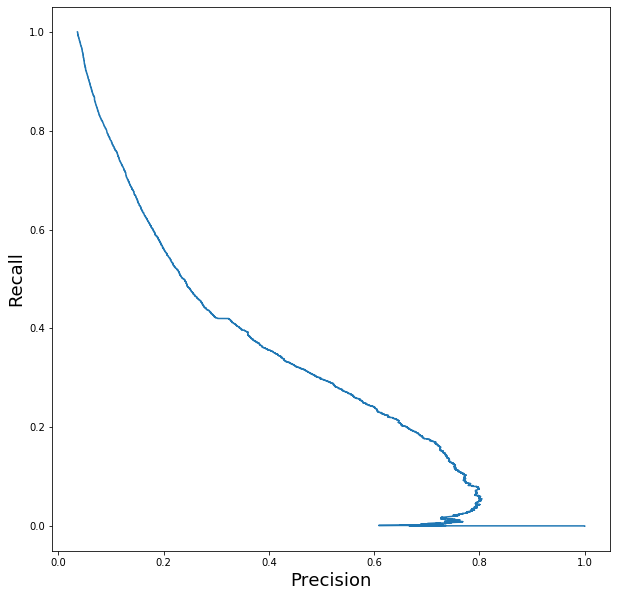

In [0]:
from sklearn.metrics import precision_recall_curve
p_bm, r_bm, th = precision_recall_curve(df.isFraud[tr_s:], train_pred)

plot(p_bm, r_bm)
ylabel('Recall', size = 18)
xlabel('Precision', size = 18)
show()

In [0]:
test_pred = lr.predict_proba(df_test_woe.fillna(0))[:,1]
submission = pd.DataFrame({'TransactionID':df_test['TransactionID'], 'isFraud': test_pred})
submission.to_csv('/content/drive/My Drive/Colab Notebooks/submission_104.csv', index = False)

In [0]:
# trying out random forest

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=10, n_estimators=10, max_features = 0.7, random_state=0)
clf.fit(df_woe[final_vars], df.isFraud)

train_pred = clf.predict_proba(df_woe[final_vars][tr_s:])[:,1]
auc2 = roc_auc_score(df.isFraud[tr_s:], train_pred)
print(auc2)

0.8486206330397097


## It is already better: see if some tuning can help:

In [0]:
C_par = [5, 7, 10, 15, 20]
penalty_par = [10, 20, 30, 100]

for i in C_par:
  for j in penalty_par:
    lr = RandomForestClassifier(max_depth=i, n_estimators=j, max_features = 0.7, random_state=0, warm_start=False)
    lr.fit(df_woe[final_vars][:tr_s], df.isFraud[:tr_s])
    train_pred = lr.predict_proba(df_woe[final_vars][tr_s:])[:,1]
    auc2 = roc_auc_score(df.isFraud[tr_s:], train_pred)
    print('auc: ' + str(round(auc2, 4))+ ' max_depth: ' + str(i)+ ' n_estimators: ' + str(j))

auc: 0.8208 max_depth: 5 n_estimators: 10
auc: 0.8249 max_depth: 5 n_estimators: 20
auc: 0.8249 max_depth: 5 n_estimators: 30
auc: 0.8261 max_depth: 5 n_estimators: 100
auc: 0.8284 max_depth: 7 n_estimators: 10
auc: 0.8293 max_depth: 7 n_estimators: 20
auc: 0.8296 max_depth: 7 n_estimators: 30
auc: 0.8301 max_depth: 7 n_estimators: 100
auc: 0.8181 max_depth: 10 n_estimators: 10
auc: 0.8209 max_depth: 10 n_estimators: 20
auc: 0.8215 max_depth: 10 n_estimators: 30
auc: 0.822 max_depth: 10 n_estimators: 100
auc: 0.8099 max_depth: 15 n_estimators: 10
auc: 0.8112 max_depth: 15 n_estimators: 20
auc: 0.8115 max_depth: 15 n_estimators: 30
auc: 0.8117 max_depth: 15 n_estimators: 100
auc: 0.81 max_depth: 20 n_estimators: 10
auc: 0.8111 max_depth: 20 n_estimators: 20
auc: 0.8114 max_depth: 20 n_estimators: 30
auc: 0.8118 max_depth: 20 n_estimators: 100


In [48]:
# trying out random forest

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=10, n_estimators=10, max_features = 0.7, random_state=0)
clf.fit(df_woe[final_vars], df.isFraud)

train_pred = clf.predict_proba(df_woe[final_vars][tr_s:])[:,1]
auc2 = roc_auc_score(df.isFraud[tr_s:], train_pred)
print(auc2)

0.8486206330397097


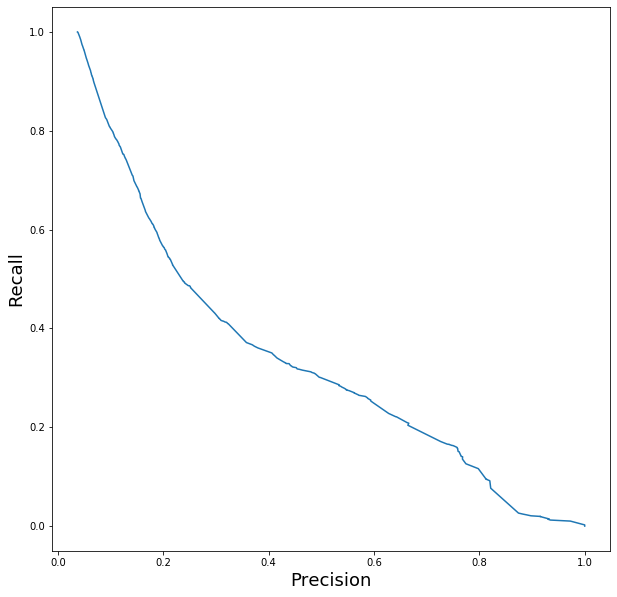

In [51]:
from sklearn.metrics import precision_recall_curve
p_rf0, r_rf0, th = precision_recall_curve(df.isFraud[tr_s:], train_pred)

plot(p_rf0, r_rf0)
ylabel('Recall', size = 18)
xlabel('Precision', size = 18)
show()

In [0]:
test_pred = clf.predict_proba(df_test_woe[final_vars].fillna(0))[:,1]
submission = pd.DataFrame({'TransactionID':df_test['TransactionID'], 'isFraud': test_pred})
submission.to_csv('/content/drive/My Drive/Colab Notebooks/submission_rf0.csv', index = False)

## what happens if not woe-binned :

In [0]:
final_vars
final_not_woe = []
for i in final_vars:
    final_not_woe.append(i.replace('_woe',''))

In [53]:
final_not_woe

['C11', 'C13', 'C5', 'D10', 'V280', 'V45']

In [54]:
clf = RandomForestClassifier(max_depth=10, n_estimators=10, max_features = 0.7, random_state=0)
clf.fit(df[final_not_woe].fillna(0), df.isFraud)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=0.7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [55]:
train_pred = clf.predict_proba(df[final_not_woe][tr_s:].fillna(0))[:,1]
auc2 = roc_auc_score(df.isFraud[tr_s:], train_pred)
print(auc2)

0.8596531277098052


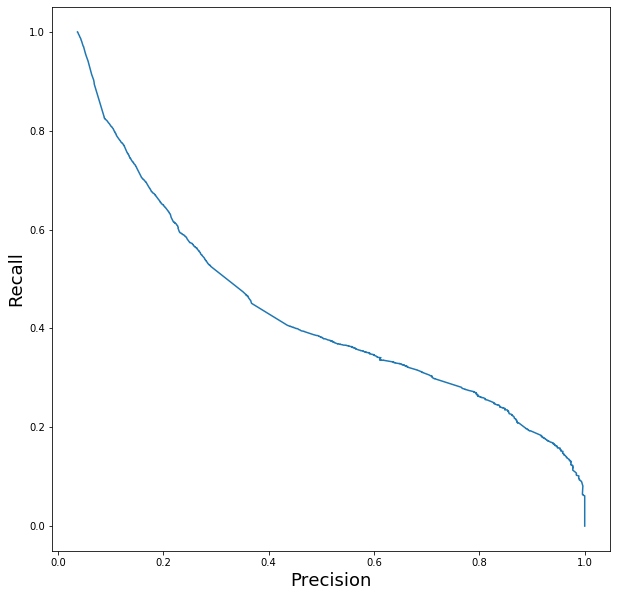

In [56]:
p_rf0, r_rf0, th = precision_recall_curve(df.isFraud[tr_s:], train_pred)

plot(p_rf0, r_rf0)
ylabel('Recall', size = 18)
xlabel('Precision', size = 18)
show()

In [0]:
test_pred = clf.predict_proba(df_test[final_not_woe].fillna(0))[:,1]
submission = pd.DataFrame({'TransactionID':df_test['TransactionID'], 'isFraud': test_pred})
submission.to_csv('/content/drive/My Drive/Colab Notebooks/submission_rf_nw.csv', index = False)

## Ok, test it with bigger data:
#### first with woe binning

0.9278801815227263


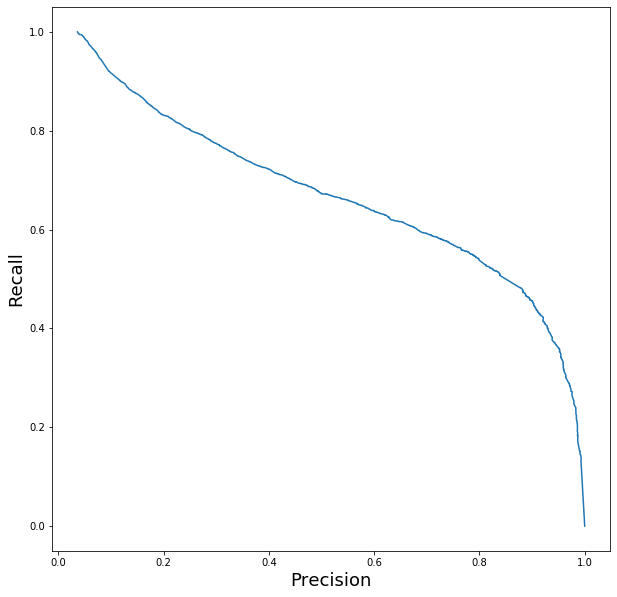

In [57]:
clf = RandomForestClassifier(max_depth=15, n_estimators=2, max_features = 0.7, random_state=0)
clf.fit(df_woe[:tr_s], df.isFraud[:tr_s])

train_pred = clf.predict_proba(df_woe[tr_s:].fillna(0))[:,1]
auc2 = roc_auc_score(df.isFraud[tr_s:], train_pred)
print(auc2)

p_rf0, r_rf0, th = precision_recall_curve(df.isFraud[tr_s:], train_pred)

plot(p_rf0, r_rf0)
ylabel('Recall', size = 18)
xlabel('Precision', size = 18)
show()

An incredibel high precision recall

0.9403797342782462


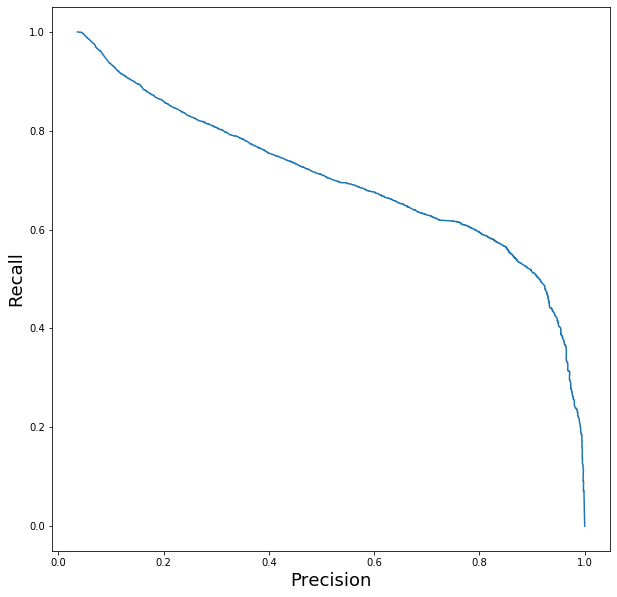

In [58]:
clf = RandomForestClassifier(max_depth=15, n_estimators=4, max_features = 0.7, random_state=0)
clf.fit(df_woe[:tr_s], df.isFraud[:tr_s])

train_pred = clf.predict_proba(df_woe[tr_s:].fillna(0))[:,1]
auc2 = roc_auc_score(df.isFraud[tr_s:], train_pred)
print(auc2)

p_rf0, r_rf0, th = precision_recall_curve(df.isFraud[tr_s:], train_pred)

plot(p_rf0, r_rf0)
ylabel('Recall', size = 18)
xlabel('Precision', size = 18)
show()

0.9441180442379997


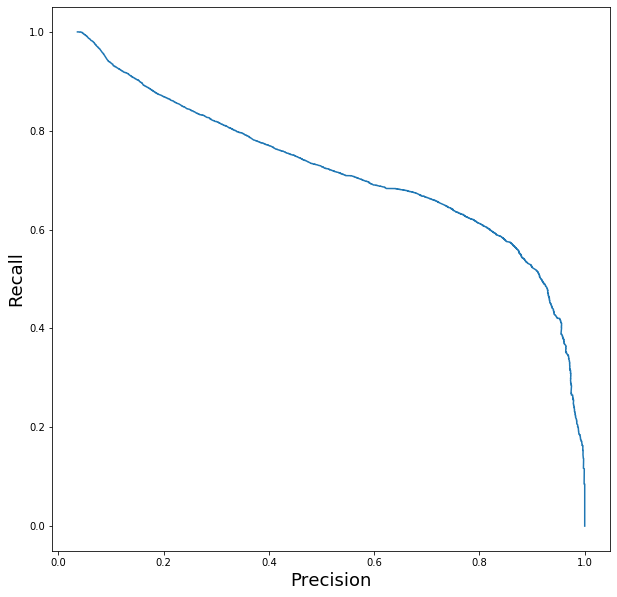

In [59]:
clf = RandomForestClassifier(max_depth=15, n_estimators=6, max_features = 0.7, random_state=0)
clf.fit(df_woe[:tr_s], df.isFraud[:tr_s])

train_pred = clf.predict_proba(df_woe[tr_s:].fillna(0))[:,1]
auc2 = roc_auc_score(df.isFraud[tr_s:], train_pred)
print(auc2)

p_rf0, r_rf0, th = precision_recall_curve(df.isFraud[tr_s:], train_pred)

plot(p_rf0, r_rf0)
ylabel('Recall', size = 18)
xlabel('Precision', size = 18)
show()

0.9463054453796587


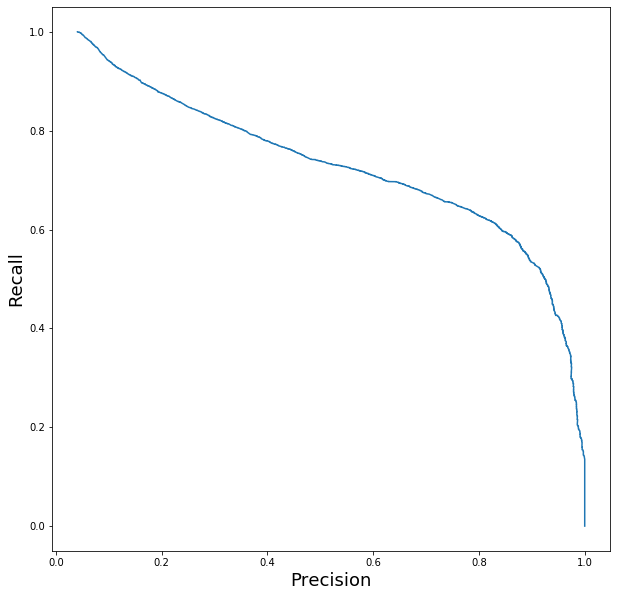

In [60]:
clf = RandomForestClassifier(max_depth=15, n_estimators=10, max_features = 0.7, random_state=0)
clf.fit(df_woe, df.isFraud)

train_pred = clf.predict_proba(df_woe[tr_s:].fillna(0))[:,1]
auc2 = roc_auc_score(df.isFraud[tr_s:], train_pred)
print(auc2)

p_rf0, r_rf0, th = precision_recall_curve(df.isFraud[tr_s:], train_pred)

plot(p_rf0, r_rf0)
ylabel('Recall', size = 18)
xlabel('Precision', size = 18)
show()

In [61]:
clf = RandomForestClassifier(max_depth=15, n_estimators=10, max_features = 0.7, random_state=0)
clf.fit(df_woe, df.isFraud)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features=0.7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
test_pred = clf.predict_proba(df_test_woe.fillna(0))[:,1]
submission = pd.DataFrame({'TransactionID':df_test['TransactionID'], 'isFraud': test_pred})
submission.to_csv('/content/drive/My Drive/Colab Notebooks/submission_rf_big_w.csv', index = False)

## Trying out without woe binning

In [84]:
df.dtypes.head()

TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
dtype: object

0.8445158131934649


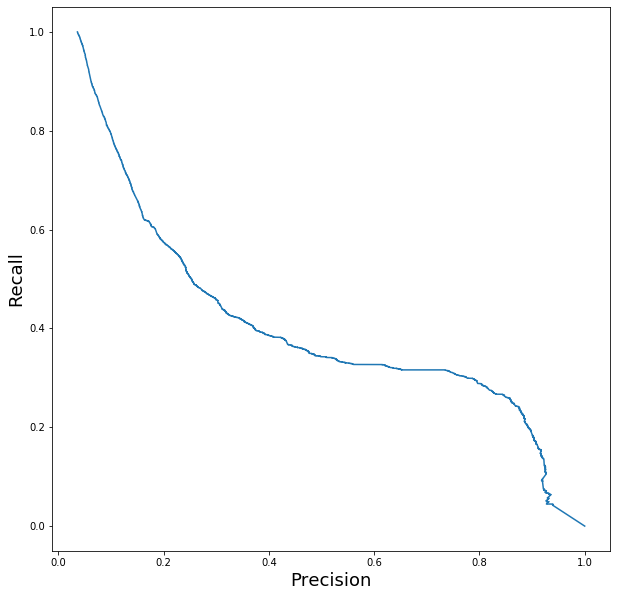

In [90]:
clf = RandomForestClassifier(max_depth=15, n_estimators=20, max_features = 0.8, random_state=0)
clf.fit(df[list(df_to_woe.columns)][:tr_s].fillna(0).select_dtypes(exclude = 'object'), df[:tr_s].isFraud)

train_pred = clf.predict_proba(df[list(df_to_woe.columns)][tr_s:].fillna(0).select_dtypes(exclude = 'object'))[:,1]
auc2 = roc_auc_score(df.isFraud[tr_s:], train_pred)
print(auc2)

p_rf0, r_rf0, th = precision_recall_curve(df.isFraud[tr_s:], train_pred)

plot(p_rf0, r_rf0)
ylabel('Recall', size = 18)
xlabel('Precision', size = 18)
show()

In [88]:
df[list(df_to_woe.columns)][:tr_s].fillna(0).select_dtypes(exclude = 'object')

,V308,V56,V92,addr1,V64,C1,V42,V2,V43,V13,V10,V71,C2,V1,V40,V9,V15,V29,C11,V4,D2,V72,V74,V16,D4,V93,V59,V78,V60,V50,V81,V38,V70,V57,V6,V282,V49,D5,V11,V75,...,V84,card5,C14,V21,V3,V17,V79,V39,V69,V94,V303,C5,V5,V90,V8,V73,V32,D3,dist1,V87,V54,V304,V283,V36,V18,V48,V51,V302,C13,V63,V280,V12,V52,D11,D1,card3,V7,V53,D15,V58
0,0.000000,1.0,0.0,315.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,142.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,13.0,19.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,13.0,14.0,150.0,1.0,1.0,0.0,0.0
1,0.000000,1.0,0.0,325.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,102.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,0.0,0.0,0.0,0.0
2,0.000000,1.0,0.0,330.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,166.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,287.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,315.0,0.0,150.0,1.0,1.0,315.0,0.0
3,925.000000,1.0,0.0,476.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,112.0,0.0,0.0,0.0,94.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,117.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,25.0,0.0,28.0,1.0,0.0,0.0,112.0,150.0,0.0,1.0,111.0,0.0
4,0.000000,0.0,0.0,420.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,102.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0.000000,1.0,0.0,299.0,0.0,2.0,0.0,1.0,0.0,2.0,1.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0,3.0,1.0,198.0,0.0,0.0,0.0,193.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,37.0,1.0,1.0,...,0.0,226.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,37.0,2.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,10.0,0.0,0.0,1.0,0.0,193.0,198.0,150.0,1.0,1.0,168.0,0.0
299996,57.950001,1.0,0.0,299.0,0.0,2.0,0.0,1.0,0.0,2.0,1.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0,3.0,1.0,198.0,0.0,0.0,0.0,193.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,226.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,11.0,0.0,1.0,1.0,0.0,193.0,198.0,150.0,1.0,1.0,168.0,0.0
299997,0.000000,1.0,0.0,126.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,226.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,9.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,150.0,1.0,1.0,0.0,0.0
299998,0.000000,1.0,0.0,436.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,3.0,1.0,0.0,1.0,0.0,1.0,2.0,1.0,246.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,224.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,7.0,20.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,246.0,246.0,150.0,1.0,1.0,0.0,0.0


In [0]:
#

Leaving Out the categorical values does not help

## Trying out the xgboost


0.8573756650269813


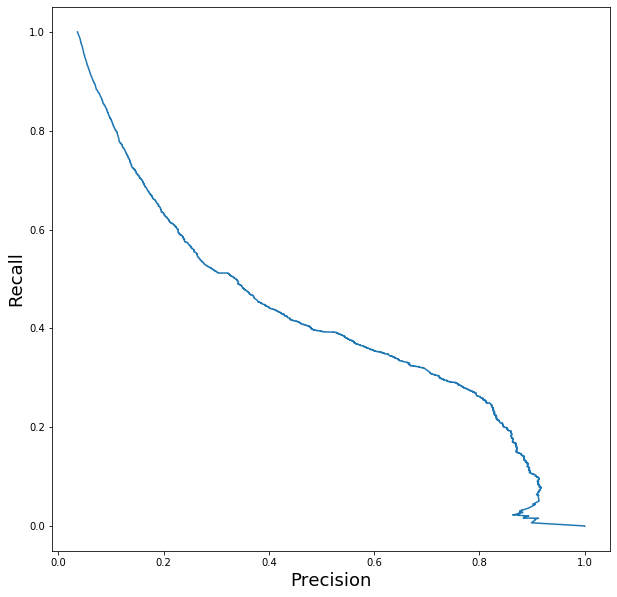

In [107]:
import xgboost as xgb


xgb_ = xgb.XGBClassifier(max_depth=10, eta = 0.8, n_estimators = 20, learning_rate=0.1
                        ,num_round = 20, objective='binary:logistic')
xgb_.fit(df_woe[:tr_s],df.isFraud[:tr_s] ,eval_metric='auc',
        verbose=True)

train_pred = xgb_.predict_proba(df_woe[tr_s:].fillna(0))[:,1]
auc2 = roc_auc_score(df.isFraud[tr_s:], train_pred)
print(auc2)

p_rf0, r_rf0, th = precision_recall_curve(df.isFraud[tr_s:], train_pred)

plot(p_rf0, r_rf0)
ylabel('Recall', size = 18)
xlabel('Precision', size = 18)
show()

In [106]:
xgb_ = xgb.XGBClassifier(max_depth=10, eta = 0.8, n_estimators = 20, learning_rate=0.1
                        ,num_round = 20, objective='binary:logistic')
xgb_.fit(df_woe,df.isFraud ,eval_metric='auc',
        verbose=True)

KeyboardInterrupt: ignored

In [0]:
test_pred = xgb_.predict_proba(df_test_woe.fillna(0))[:,1]
submission = pd.DataFrame({'TransactionID':df_test['TransactionID'], 'isFraud': test_pred})
submission.to_csv('/content/drive/My Drive/Colab Notebooks/submission_xgb_big_w.csv', index = False)

# Lets see if we can improve our results with minority oversampling- or undersamplig

In [108]:
import imblearn

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
from imblearn import under_sampling

res = under_sampling.RandomUnderSampler( 'auto',  ratio = 0.1)
df_new, y_new = res.fit_resample(df_woe[:tr_s],df.isFraud[:tr_s])

0.8601809818539431


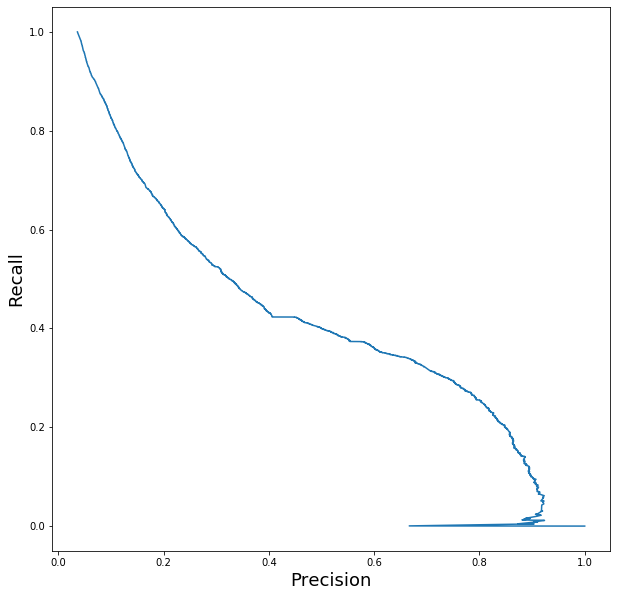

In [122]:
import xgboost as xgb


xgb_ = xgb.XGBClassifier(max_depth=10, eta = 0.8, n_estimators = 20, learning_rate=0.1
                        ,num_round = 20, objective='binary:logistic')
xgb_.fit(df_new,y_new ,eval_metric='auc',
        verbose=True)

train_pred = xgb_.predict_proba(array(df_woe[tr_s:].fillna(0)))[:,1]
auc2 = roc_auc_score(df.isFraud[tr_s:], train_pred)
print(auc2)

p_rf0, r_rf0, th = precision_recall_curve(df.isFraud[tr_s:], train_pred)

plot(p_rf0, r_rf0)
ylabel('Recall', size = 18)
xlabel('Precision', size = 18)
show()

0.8711261379065357


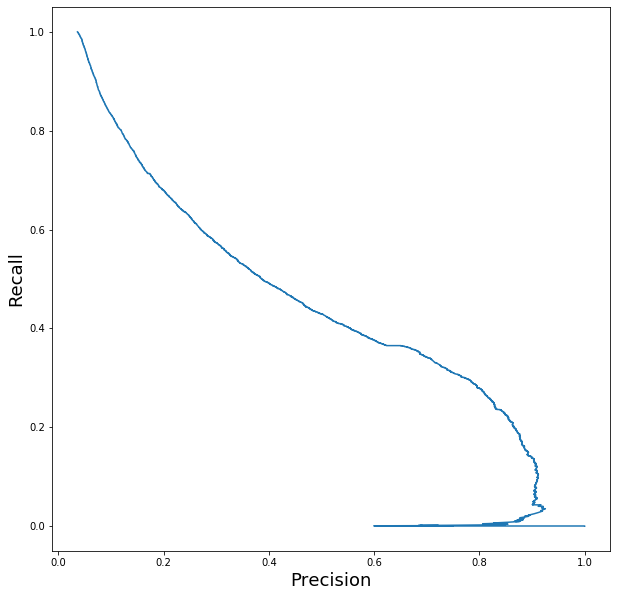

In [123]:
import xgboost as xgb


xgb_ = xgb.XGBClassifier(max_depth=10, eta = 0.3, n_estimators = 100, learning_rate=0.1, colsample_by_tree = 0.85
                        ,num_round = 40, objective='binary:logistic')
xgb_.fit(df_new,y_new ,eval_metric='auc' ,       
        verbose=True)

train_pred = xgb_.predict_proba(array(df_woe[tr_s:].fillna(0)))[:,1]
auc2 = roc_auc_score(df.isFraud[tr_s:], train_pred)
print(auc2)

p_rf0, r_rf0, th = precision_recall_curve(df.isFraud[tr_s:], train_pred)

plot(p_rf0, r_rf0)
ylabel('Recall', size = 18)
xlabel('Precision', size = 18)
show()

In [0]:
# try other ratio

0.8702450688165224


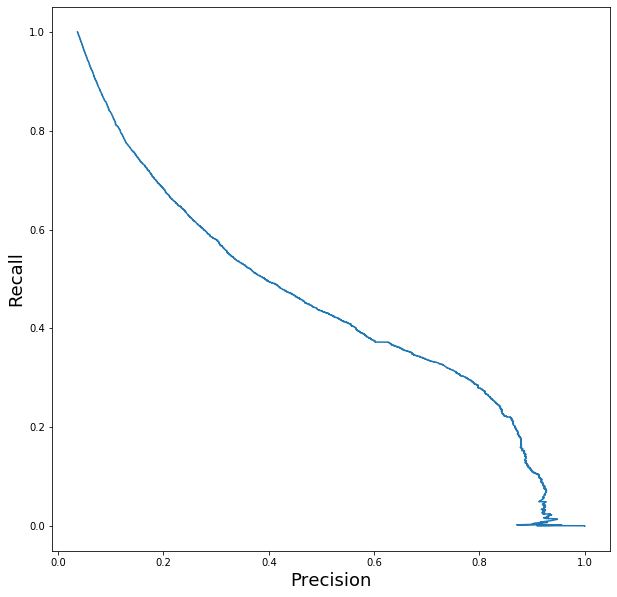

In [128]:
import xgboost as xgb

from imblearn import under_sampling

res = under_sampling.RandomUnderSampler( 'auto',  ratio = 0.1)
df_new, y_new = res.fit_resample(df_woe[:tr_s],df.isFraud[:tr_s])


xgb_ = xgb.XGBClassifier(max_depth=10, eta = 0.3, n_estimators = 100, learning_rate=0.1, colsample_by_tree = 0.85
                        ,num_round = 40, objective='binary:logistic')
xgb_.fit(df_new,y_new ,eval_metric='auc' ,       
        verbose=True)

train_pred = xgb_.predict_proba(array(df_woe[tr_s:].fillna(0)))[:,1]
auc2 = roc_auc_score(df.isFraud[tr_s:], train_pred)
print(auc2)

p_rf0, r_rf0, th = precision_recall_curve(df.isFraud[tr_s:], train_pred)

plot(p_rf0, r_rf0)
ylabel('Recall', size = 18)
xlabel('Precision', size = 18)
show()

In [129]:
import xgboost as xgb

from imblearn import under_sampling

res = under_sampling.RandomUnderSampler( 'auto',  ratio = 0.1)
df_new, y_new = res.fit_resample(df_woe,df.isFraud)


xgb_ = xgb.XGBClassifier(max_depth=10, eta = 0.3, n_estimators = 100, learning_rate=0.1, colsample_by_tree = 0.85
                        ,num_round = 40, objective='binary:logistic')
xgb_.fit(df_new,y_new ,eval_metric='auc' ,       
        verbose=True)

test_pred = xgb_.predict_proba(array(df_test_woe.fillna(0)))[:,1]
submission = pd.DataFrame({'TransactionID':df_test['TransactionID'], 'isFraud': test_pred})
submission.to_csv('/content/drive/My Drive/Colab Notebooks/submission_xgb_big_w_unders.csv', index = False)

ValueError: ignored

In [1]:
test_pred = xgb_.predict_proba(array(df_test_woe.fillna(0)))[:,1]
submission = pd.DataFrame({'TransactionID':df_test['TransactionID'], 'isFraud': test_pred})
submission.to_csv('/content/drive/My Drive/Colab Notebooks/submission_xgb_big_w_unders.csv', index = False)

NameError: ignored